In [3]:
import numpy as np
from sklearn.manifold import TSNE
import pandas as pd
import seaborn as sns
import pickle
# sns.set_theme(color_codes=True)
# sns.set_theme(color_codes=True)
sns.set_theme(style="white", palette=None)
import matplotlib.pyplot as plt

data_file = "./outputs/"+"atten_scores-no_reg_emb.pkl"
with open(data_file,'rb') as f:
    data = pickle.load(f)
dataset = data[0]
embeds = []
for d in data[1]:
    for dl in d:
        embeds.append(dl.numpy())
embeds = np.array(embeds)
dataset = []
for d in data[0]:
    for dl in d:
        dataset.append(dl)

In [4]:
from collections import defaultdict
import random

def random_shuffle(d, index):
    ret = []
    for i in index:
        ret.append(d[i])
    return ret
    
def process(emb, dataset):
    md = defaultdict(lambda: [])
    for e,d in zip(emb,dataset):
        if len(md[d]) < 2000:
            md[d].append(e)
    re = []
    rd = []
    for k,v in md.items():
        re+=[k]*len(v)
        rd.extend(v)
    index = [*range(len(re))]
    random.shuffle(index)
    re = random_shuffle(re, index)
    rd = random_shuffle(rd, index)
    return np.array(rd), re

In [71]:
embeds.shape

(7, 1000, 5)

In [5]:
embeds,dataset = process(embeds, dataset)

In [6]:
# X_embedded = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=10).fit_transform(embeds)
X_embedded = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=5, n_iter=5000).fit_transform(embeds)
data_frame2 = {'x':[],'y':[],'dataset':[]}
for emb, d in zip(X_embedded, dataset):
    data_frame2['x'].append(emb[0])
    data_frame2['y'].append(emb[1])
    data_frame2['dataset'].append(d)
data_frame2 = pd.DataFrame.from_dict(data_frame2)


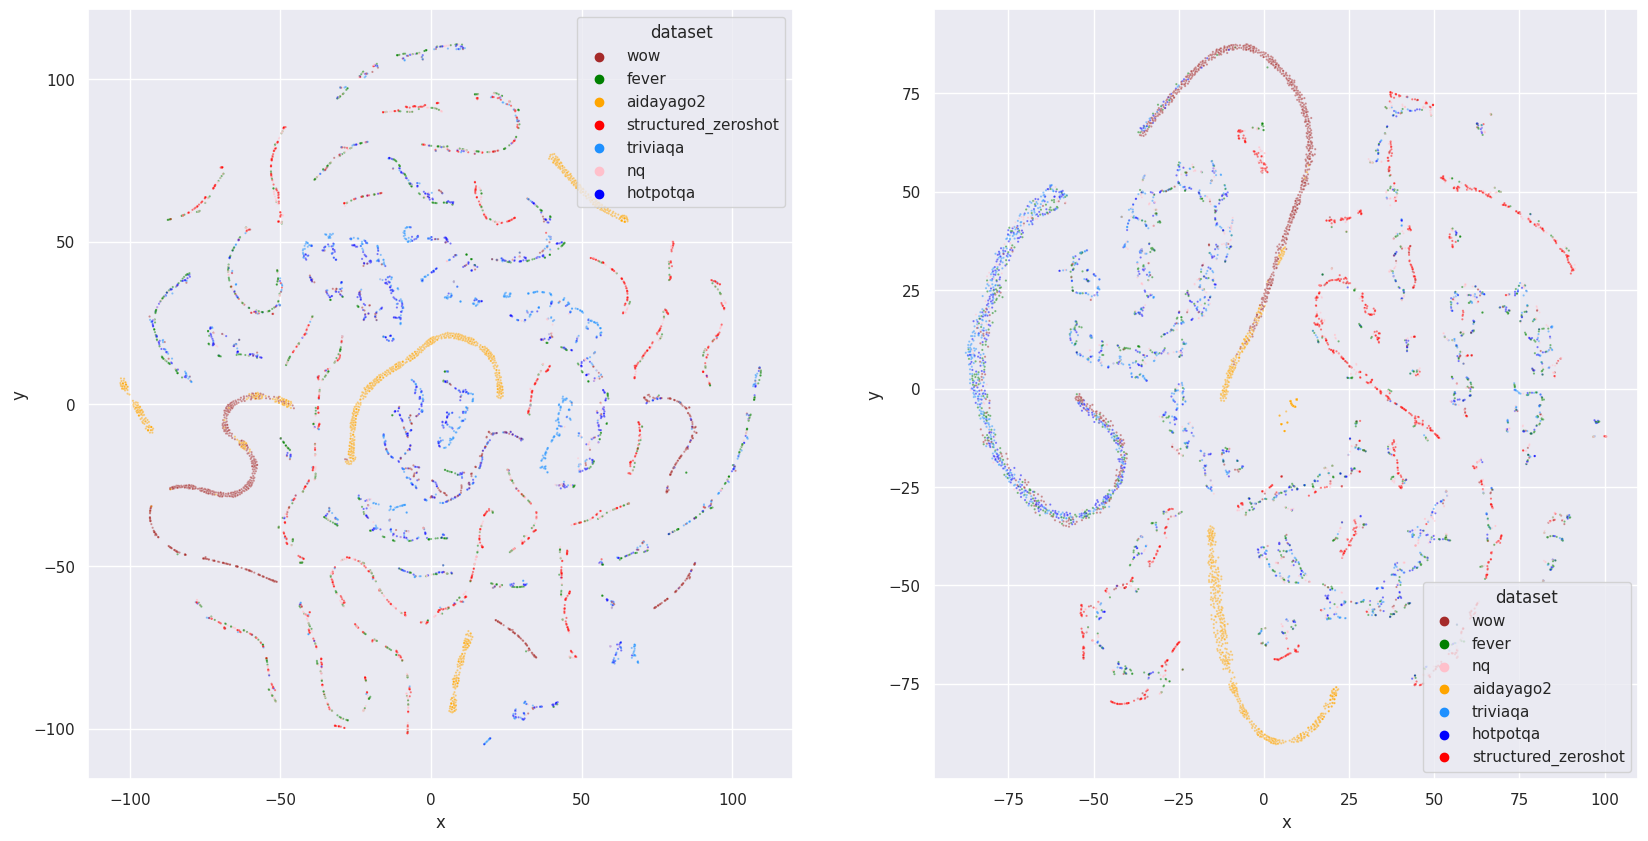

In [176]:
# fig = plt.figure(figsize=(100, 50), dpi=80)
# add subplots
fig,(ax1,ax2) =  plt.subplots(1, 2,figsize=(20, 10))
color_dict = dict({'wow':'brown',
                  'fever':'green',
                  'aidayago2': 'orange',
                  'structured_zeroshot': 'red',
                   'triviaqa': 'dodgerblue',
                  'nq':'pink',
                  'hotpotqa':'blue'})

g = sns.scatterplot(x="x", y="y", hue="dataset", data=data_frame2,s=2.5, alpha = 0.5,ax=ax1,palette=color_dict)

g = sns.scatterplot(x="x", y="y", hue="dataset", data=data_frame,s=2.5, alpha = 0.5,ax=ax2,palette=color_dict)
# for lh in g._legend.legendHandles: 
#     lh.set_alpha(1)

# plt.subplot(1, 2, 2)
# g = sns.lmplot(x="x", y="y", hue="dataset", data=data_frame,fit_reg=False,scatter_kws={"s":50, "alpha":0.1})
# for lh in g._legend.legendHandles: 
#     lh.set_alpha(1)

In [125]:
t = "\textbf{79.05}&	33.63&	34.99&	\textbf{50.06}&	27.44& 43.81 &	15.61&	\textbf{23.71}&	70.42"
t = t.replace(' ','').replace('\t','').replace('extbf{','').replace('}','')
tt = t.split('&')
r = 0
for s in tt:
    r += float(s)
print(r/len(tt))

42.080000000000005


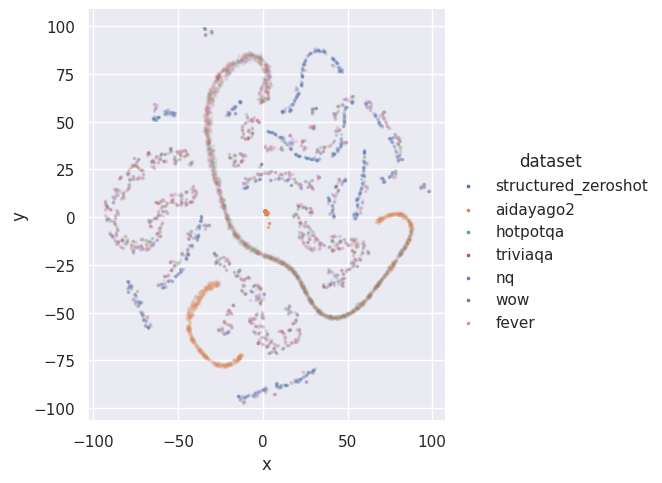

In [135]:
g = sns.lmplot(x="x", y="y", hue="dataset", data=data_frame,fit_reg=False,scatter_kws={"s":2.5, "alpha":0.1})
for lh in g._legend.legendHandles: 
    lh.set_alpha(1)

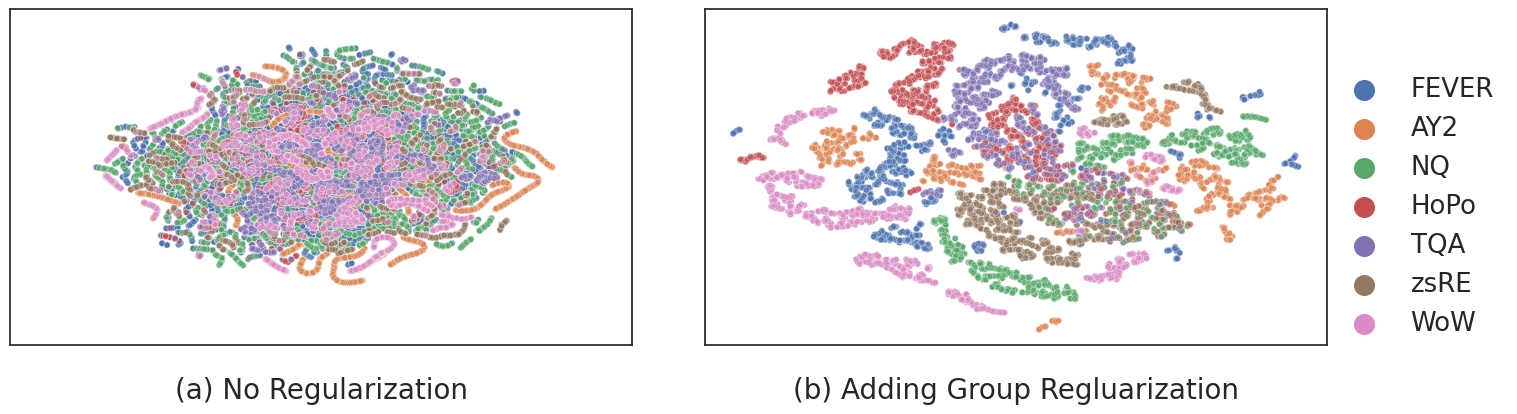

In [630]:
import numpy as np
from sklearn.manifold import TSNE
import pandas as pd
import seaborn as sns
import pickle

import numpy as np
from sklearn.manifold import TSNE
import pandas as pd
import seaborn as sns
import pickle
sns.set_theme(color_codes=True)
data_file = "./outputs/"+"atten_scores-cluster_emb2.pkl"
with open(data_file,'rb') as f:
    data = pickle.load(f)
dataset = data[0]
embeds = []
for d in data[1]:
    for dl in d:
        embeds.append(dl.numpy())
embeds = np.array(embeds)
dataset = []
for d in data[0]:
    for dl in d:
        dataset.append(dl)
from collections import defaultdict
import random

def random_shuffle(d, index):
    ret = []
    for i in index:
        ret.append(d[i])
    return ret
    
def process(emb, dataset):
    md = defaultdict(lambda: [])
    for e,d in zip(emb,dataset):
        if len(md[d]) < 2000:
            md[d].append(e)
    for e,d in md.items():
        d = np.array(d)
        m = np.mean(d, 0)
        m = np.expand_dims(m, 0)
        v = d - m
#         d = m + v/np.sqrt(np.abs(v))
        d = m + np.sqrt(np.sqrt(np.sqrt(np.abs(v))))
        md[e] = d
        
        
    re = []
    rd = []
    for k,v in md.items():
        re+=[k]*len(v)
        rd.extend(v)
    index = [*range(len(re))]
    random.shuffle(index)
    re = random_shuffle(re, index)
    rd = random_shuffle(rd, index)
    return np.array(rd), re
# embeds,dataset = process(embeds, dataset)
# X_embedded = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=5, n_iter=25000).fit_transform(embeds)

# data_frame = {'x':[],'y':[],'dataset':[]}
# for emb, d in zip(X_embedded, dataset):
#     data_frame['x'].append(emb[0])
#     data_frame['y'].append(emb[1])
#     data_frame['dataset'].append(d)
# data_frame = pd.DataFrame.from_dict(data_frame)


color_dict = dict({'wow':'brown',
                  'fever':'green',
                  'aidayago2': 'orange',
                  'structured_zeroshot': 'red',
                   'triviaqa': 'dodgerblue',
                  'nq':'pink',
                  'hotpotqa':'blue'})
# fig,(ax1,ax2) =  plt.subplots(1, 2,figsize=(20, 10))
# g = sns.scatterplot(x="x", y="y", hue="dataset", data=data_frame2,s=20, alpha = 0.5,ax=ax1,palette=color_dict)
# g = sns.scatterplot(x="x", y="y", hue="dataset", data=data_frame,s=20, alpha = 0.5,ax=ax2,palette=color_dict)
sns.set_style("white",rc={"lines.linewidth": 1,'scatter.edgecolors':'none','fontsize':2},)
maps = {'aidayago2':'AY2','structured_zeroshot':'zsRE','nq':'NQ','hotpotqa':'HoPo','wow':'WoW','triviaqa':'TQA','fever':'FEVER'}


f3 = pd.concat([data_frame2,data_frame])
f3["s"]=100
for k,v in maps.items():
    f3.loc[f3["dataset"] == k,"dataset"] = v
with sns.plotting_context("notebook", font_scale=1.7):
    ax = sns.relplot(data=f3,x="x", y="y", hue="dataset",col="Apply Reg",kind="scatter",s=20,alpha=0.5,height=5,aspect=1.5,legend="full")
#ax.tick_params(left=False, bottom=False) 
ax.set(yticks=[])
ax.set(xticks=[])
ax._legend.set_title("")
for lh in ax._legend.legendHandles: 
    lh.set_alpha(1)
    lh._sizes = [200] 

axes = ax.axes.flatten()
axes[0].set_title("(a) No Regularization",pad=-280,fontsize=20)
axes[1].set_title("(b) Adding Group Regluarization",pad=-280,fontsize=20)
ax.legend.markerscale=100
ax.legend.title = ""

ax.set_axis_labels("", "")
sns.despine(top=False, right=False, left=False, bottom=False)
ax.savefig("tSNE-plot.png") 

In [1]:
sns.set_style("white",rc={"lines.linewidth": 1,'scatter.edgecolors':'none','fontsize':2},)
with sns.plotting_context("notebook", font_scale=1.7):
    ax = sns.relplot(data=f3,x="x", y="y", hue="dataset",col="Apply Reg",kind="scatter",s=20,alpha=0.5,height=5,aspect=1.5,legend="full",linewidth=0.25)
#ax.tick_params(left=False, bottom=False) 
ax.set(yticks=[])
ax.set(xticks=[])
ax._legend.set_title("")
for lh in ax._legend.legendHandles: 
    lh.set_alpha(1)
    lh._sizes = [200] 

axes = ax.axes.flatten()
axes[0].set_title("(a) w/o CPR",pad=-280,fontsize=20)
axes[1].set_title("(b) CPR",pad=-280,fontsize=20)
ax.legend.markerscale=100
ax.legend.title = ""

ax.set_axis_labels("", "")
sns.despine(top=False, right=False, left=False, bottom=False)
ax.savefig("tSNE-plot.png") 

NameError: name 'sns' is not defined

,x,y,dataset,Apply Reg,s
0,144.955856,88.333687,FEVER,False,100
1,-38.570320,-152.611694,FEVER,False,100
2,140.134872,41.747707,FEVER,False,100
3,-86.955215,-227.299133,FEVER,False,100
4,181.788635,101.809563,FEVER,False,100
...,...,...,...,...,...
13995,-68.494759,-339.578644,wow,True,100
13996,-26.156656,273.894196,triviaqa,True,100
13997,16.429146,-29.941172,triviaqa,True,100
13998,-265.652924,-30.119791,wow,True,100


In [450]:
# df = data_frame
# print(df.loc[df['dataset'] == 'nq'])
# for k,v in color_dict:
#     d = df.loc[df['dataset'] == k]

                x           y dataset Apply Reg
8      303.828461   39.098629      nq      True
11     194.430267 -156.217422      nq      True
25     259.491791   92.016350      nq      True
31     149.111023   45.743984      nq      True
33     247.655289   71.112686      nq      True
...           ...         ...     ...       ...
13968  -93.349365 -196.665771      nq      True
13982  166.723160 -148.950562      nq      True
13983  284.512421   32.583786      nq      True
13985 -103.992531 -161.466949      nq      True
13993  129.501724 -180.019699      nq      True

[2000 rows x 4 columns]


In [452]:
# u = np.mean(df.loc[df['dataset'] == 'nq'])

/home/v-zefengcai/miniconda3/envs/webt5/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/home/v-zefengcai/miniconda3/envs/webt5/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [609]:
import numpy as np
from sklearn.manifold import TSNE
import pandas as pd
import seaborn as sns
import pickle
sns.set_theme(color_codes=True)
data_file = "./outputs/"+"atten_scores-cluster_emb2.pkl"
with open(data_file,'rb') as f:
    data = pickle.load(f)
dataset = data[0]
embeds = []
for d in data[1]:
    for dl in d:
        embeds.append(dl.numpy())
embeds = np.array(embeds)
dataset = []
for d in data[0]:
    for dl in d:
        dataset.append(dl)
from collections import defaultdict
import random

def random_shuffle(d, index):
    ret = []
    for i in index:
        ret.append(d[i])
    return ret
    
def process(emb, dataset):
    md = defaultdict(lambda: [])
    for e,d in zip(emb,dataset):
        if len(md[d]) < 2000:
            md[d].append(e)
    for e,d in md.items():
        d = np.array(d)
#         m = np.mean(d, 0)
#         m = np.expand_dims(m, 0)
#         v = d - m
# #         d = m + v/np.sqrt(np.abs(v))
#         d = m + np.sqrt(np.sqrt(np.sqrt(np.abs(v))))
        md[e] = d
        
        
    re = []
    rd = []
    for k,v in md.items():
        re+=[k]*len(v)
        rd.extend(v)
    index = [*range(len(re))]
    random.shuffle(index)
    re = random_shuffle(re, index)
    rd = random_shuffle(rd, index)
    return np.array(rd), re
embeds,dataset = process(embeds, dataset)

In [610]:
from collections import defaultdict
nd = defaultdict(lambda : [])
for e,d in zip(embeds, dataset):
    nd[d].append(e)

In [611]:
for k,v in nd.items():
    nd[k] = np.mean(v,0)


In [613]:
data_d = {'source':[],'target':[],'similiarity':[]}
maps = {'aidayago2':'AY2','structured_zeroshot':'zsRE','nq':'NQ','hotpotqa':'HoPo','wow':'WoW','triviaqa':'TQA','fever':'FEVER'}
from numpy.linalg import norm 
for k,v in nd.items():
    for k2,v2 in nd.items():
        rk = maps[k]
        rk2 = maps[k2]
        data_d['source'].append(rk)
        data_d['target'].append(rk2)
        data_d['similiarity'].append((np.sum(v*v2)/norm(v,2)/norm(v2,2))**5)

In [550]:
nd['structured_zeroshot'] = nd['structured_zeroshot']*0.8 + nd['aidayago2']*0.2

KeyError: 'font is not a valid rc parameter (see rcParams.keys() for a list of valid parameters)'

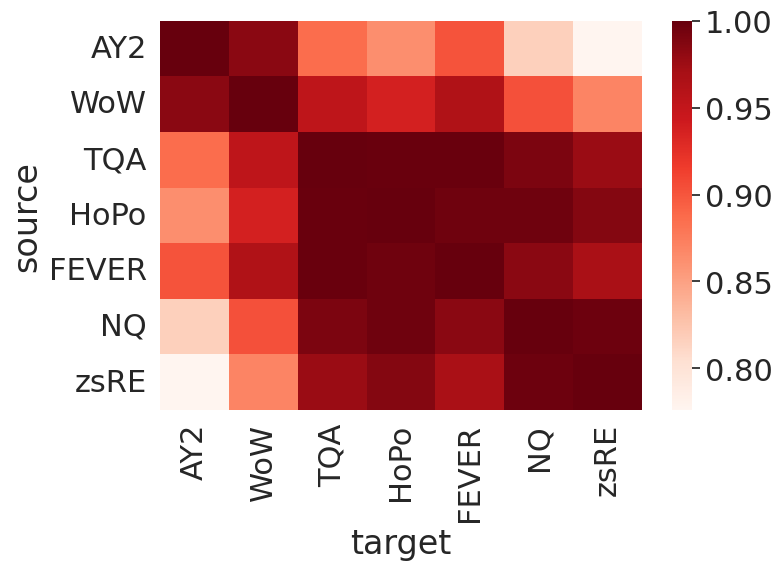

In [681]:
sim_d = pd.DataFrame.from_dict(data_d)

piv = sim_d.pivot("source", "target", "similiarity")
piv = piv.reindex(index=['AY2','WoW','TQA','HoPo','FEVER','NQ','zsRE'], columns=['AY2','WoW','TQA','HoPo','FEVER','NQ','zsRE'])
# piv.index = pd.CategoricalIndex(['aidayago2','wow','fever','nq','triviaqa','hotpotqa','structured_zeroshot'], categories= ['aidayago2','wow','fever','nq','triviaqa','hotpotqa','structured_zeroshot'],ordered=True)
# piv.sort_index(axis=1, inplace=True)
# piv.sort_index(axis=0, inplace=True)
ax = sns.heatmap(piv, cmap="Reds")
# ax = sns.clustermap(piv, cmap="Reds")
sns.set(font_scale=2)
from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 14/1.8,12/1.8*264/348


import matplotlib.patches as patches
ax.set_xlabel('')
ax.set_ylabel('')
ax.add_patch(
     patches.Rectangle(
         (5, 5),
         2.0,
         2.0,
         edgecolor='blue',
         alpha=0.5,
         fill=False,
         lw=6
     ) )
ax.add_patch(
     patches.Rectangle(
         (2, 2),
         3.0,
         3.0,
         edgecolor='blue',
         alpha=0.5,
         fill=False,
         lw=6
     ) )
ax.add_patch(
     patches.Rectangle(
         (0, 0),
         2.0,
         2.0,
         edgecolor='green',
         alpha=0.5,
         fill=False,
         lw=6
     ) )
ax.add_patch(
     patches.Rectangle(
         (2, 2),
         5.0,
         5.0,
         alpha=0.5,
         edgecolor='green',
         fill=False,
         lw=6,
         
     ) )

In [8]:
import numpy as np
from sklearn.manifold import TSNE
import pandas as pd
import seaborn as sns
import pickle

import numpy as np
from sklearn.manifold import TSNE
import pandas as pd
import seaborn as sns
import pickle
sns.set_theme(color_codes=True)
data_file = "./outputs/"+"atten_scores-cluster_emb2.pkl"
with open(data_file,'rb') as f:
    data = pickle.load(f)
dataset = data[0]
embeds = []
for d in data[1]:
    for dl in d:
        embeds.append(dl.numpy())
embeds = np.array(embeds)
dataset = []
for d in data[0]:
    for dl in d:
        dataset.append(dl)
from collections import defaultdict
import random

def random_shuffle(d, index):
    ret = []
    for i in index:
        ret.append(d[i])
    return ret
    
def process(emb, dataset):
    md = defaultdict(lambda: [])
    for e,d in zip(emb,dataset):
        if len(md[d]) < 2000:
            md[d].append(e)
    for e,d in md.items():
        d = np.array(d)
        m = np.mean(d, 0)
        m = np.expand_dims(m, 0)
        v = d - m
#         d = m + v/np.sqrt(np.abs(v))
        d = m + np.sqrt(np.sqrt(np.sqrt(np.abs(v))))
        md[e] = d
        
        
    re = []
    rd = []
    for k,v in md.items():
        re+=[k]*len(v)
        rd.extend(v)
    index = [*range(len(re))]
    random.shuffle(index)
    re = random_shuffle(re, index)
    rd = random_shuffle(rd, index)
    return np.array(rd), re
embeds,dataset = process(embeds, dataset)
X_embedded = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=5, n_iter=25000).fit_transform(embeds)

data_frame = {'x':[],'y':[],'dataset':[]}
for emb, d in zip(X_embedded, dataset):
    data_frame['x'].append(emb[0])
    data_frame['y'].append(emb[1])
    data_frame['dataset'].append(d)
data_frame = pd.DataFrame.from_dict(data_frame)


color_dict = dict({'wow':'brown',
                  'fever':'green',
                  'aidayago2': 'orange',
                  'structured_zeroshot': 'red',
                   'triviaqa': 'dodgerblue',
                  'nq':'pink',
                  'hotpotqa':'blue'})
# fig,(ax1,ax2) =  plt.subplots(1, 2,figsize=(20, 10))
# g = sns.scatterplot(x="x", y="y", hue="dataset", data=data_frame2,s=20, alpha = 0.5,ax=ax1,palette=color_dict)
# g = sns.scatterplot(x="x", y="y", hue="dataset", data=data_frame,s=20, alpha = 0.5,ax=ax2,palette=color_dict)
sns.set_style("white",rc={"lines.linewidth": 1,'scatter.edgecolors':'none','fontsize':2},)
maps = {'aidayago2':'AY2','structured_zeroshot':'zsRE','nq':'NQ','hotpotqa':'HoPo','wow':'WoW','triviaqa':'TQA','fever':'FEVER'}


f3 = pd.concat([data_frame2,data_frame])
f3["s"]=100
for k,v in maps.items():
    f3.loc[f3["dataset"] == k,"dataset"] = v
with sns.plotting_context("notebook", font_scale=1.7):
    ax = sns.relplot(data=f3,x="x", y="y", hue="dataset",col="Apply Reg",kind="scatter",s=20,alpha=0.5,height=5,aspect=1.5,legend="full")
#ax.tick_params(left=False, bottom=False) 
ax.set(yticks=[])
ax.set(xticks=[])
ax._legend.set_title("")
for lh in ax._legend.legendHandles: 
    lh.set_alpha(1)
    lh._sizes = [200] 

axes = ax.axes.flatten()
axes[0].set_title("(a) w/o CPR",pad=-280,fontsize=20)
axes[1].set_title("(b) ",pad=-280,fontsize=20)
ax.legend.markerscale=100
ax.legend.title = ""

ax.set_axis_labels("", "")
sns.despine(top=False, right=False, left=False, bottom=False)
ax.savefig("tSNE-plot.png") 

ValueError: Could not interpret value `Apply Reg` for parameter `col`

In [654]:
iris = sns.load_dataset("iris")

<AxesSubplot:xlabel='Prompt Count', ylabel='Avg Scores'>

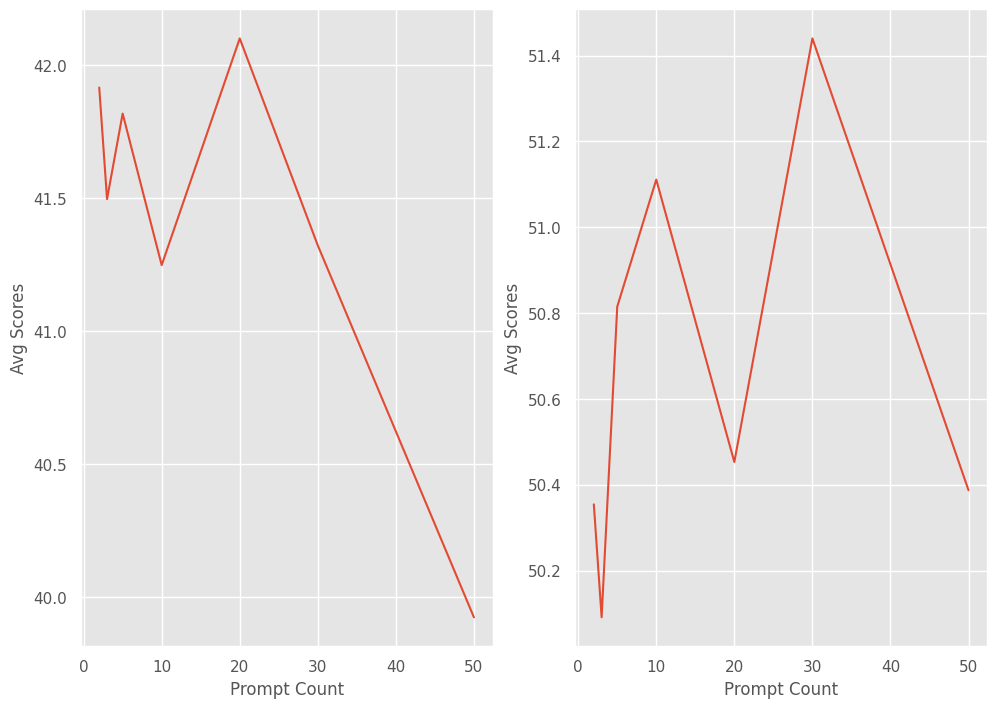

In [672]:

be = '41.91548706	41.49618211	41.81748249	41.24810093	42.10001307	41.32211599	39.9249255'
ke = '50.35462778	50.09150758	50.81508812	51.11109834	50.45329785	51.43999859	50.3875178'
bj = '39.35692715	40.775285	39.89534023	41.80881079	41.93614095	42.1000058	40.07841962'
kj = '50.01029619	50.66402556	50.50059321	50.53327968	50.63133909	51.44000231	50.36984734'

pc_dict = {'Dataset':[],'Avg Scores':[],'Prompt Count':[]}
js_dict = {'Dataset':[],'Avg Scores':[],'Reg Weight':[]}

pc = [2,3,5,10,20,30,50]
for i,s in zip(pc,be.split('\t')):
    pc_dict['Dataset'].append('BEIR')
    pc_dict['Avg Scores'].append(float(s))
    pc_dict['Prompt Count'].append(i)
    
for i,s in zip(pc,ke.split('\t')):
    pc_dict['Dataset'].append('KILT')
    pc_dict['Avg Scores'].append(float(s))
    pc_dict['Prompt Count'].append(i)

js = [0.001,0.005,0.01,0.02,0.05,0.1,0.5]
for i,s in zip(js,bj.split('\t')):
    js_dict['Dataset'].append('BEIR')
    js_dict['Avg Scores'].append(float(s))
    js_dict['Reg Weight'].append(i)
for i,s in zip(js,kj.split('\t')):
    js_dict['Dataset'].append('KILT')
    js_dict['Avg Scores'].append(float(s))
    js_dict['Reg Weight'].append(i)
    
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import matplotlib
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['axes.unicode_minus']=False

pdd = pd.DataFrame.from_dict(pc_dict)
fig, axs = plt.subplots(ncols=2)
sns.set_theme(style="white", palette=None)
sns.lineplot(y='Avg Scores',x='Prompt Count', data=pdd[pdd["Dataset"]=='BEIR'], ax=axs[0],markers='O')
sns.lineplot(y='Avg Scores',x='Prompt Count', data=pdd[pdd["Dataset"]=='KILT'], ax=axs[1],markers=True)
# sns.regplot(x='value', y='wage', data=df_melt, ax=axs[1])
# sns.boxplot(x='education',y='wage', data=df_melt, ax=axs[2])
